In [3]:
from tools.prepareData import *
from tools.createModel import *

TRAIN_PATH = r'E:\Datasets\ISIC_2020\train'
print(f"Número de imagens JPG na pasta TRAIN_PATH: {len([file for file in os.listdir(TRAIN_PATH) if file.endswith('.jpg')])}")

df = pd.read_csv(r'data\train.csv')
df_dup = pd.read_csv(r'data\train_dup.csv')

df = removeDuplicates(df,df_dup)
dfs = splitDataset(df)

dls, learners = modelGen(dfs, TRAIN_PATH)


Número de imagens JPG na pasta TRAIN_PATH: 33126


c:\Users\hugog\anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\Users\hugog\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


c:\Users\hugog\anaconda3\lib\site-packages\torch\_tensor.py:1023: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ..\aten\src\ATen\native\BatchLinearAlgebra.cpp:760.)
  ret = func(*args, **kwargs)


Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck
Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck
Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck
Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


In [4]:
for i,learner in enumerate(learners):
    learner.model_dir = 'models_5folders_res18'
    learner.load(f'model_fold_{i}')


In [5]:
interprets = [ClassificationInterpretation.from_learner(learner) for learner in learners]

## ****As metricas seguintes ainda precisam ser revisadas

In [6]:
from tools.myMetrics import *

metrics = fromInterprets(interprets)

In [7]:
printMeanMetrics(metrics)

Mean metrics for all models
F1 score: 0.8582462359781164
Balanced Accuracy: 0.8488845734677769
Accuracy: 0.8588996763754044
ROC_AUC Score: 0.8488845734677767
Precision: 0.8585362227504522
Average Precision: 0.7516742579233882


In [8]:
n = 0
printMetrics(metrics[n])

Model= {0}
F1 score= 0.8593540560224182
Balanced Accuracy= 0.8465562336530079
Accuracy= 0.86084142394822
ROC_AUC Score= 0.8465562336530078
Precision= 0.861105589260929
Average Precision= 0.7601876853364483


In [9]:
n = 1
printMetrics(metrics[n])

Model= {1}
F1 score= 0.8668334065816985
Balanced Accuracy= 0.8586094158674804
Accuracy= 0.8673139158576052
ROC_AUC Score= 0.8586094158674803
Precision= 0.8668251153297292
Average Precision= 0.7657456656323663


In [10]:
n = 2
printMetrics(metrics[n])

Model= {2}
F1 score= 0.8574091190332511
Balanced Accuracy= 0.8505013077593724
Accuracy= 0.8576051779935275
ROC_AUC Score= 0.8505013077593724
Precision= 0.8572871424263134
Average Precision= 0.7487461900092245


In [11]:
n = 3
printMetrics(metrics[n])

Model= {3}
F1 score= 0.8408496810366641
Balanced Accuracy= 0.831669572798605
Accuracy= 0.8414239482200647
ROC_AUC Score= 0.831669572798605
Precision= 0.8407318982779622
Average Precision= 0.7250175673150563


In [12]:
n = 4
printMetrics(metrics[n])

Model= {4}
F1 score= 0.866784917216551
Balanced Accuracy= 0.8570863372604185
Accuracy= 0.8673139158576052
ROC_AUC Score= 0.8570863372604185
Precision= 0.8667313684573277
Average Precision= 0.758674181323845


## Matrizes confusão

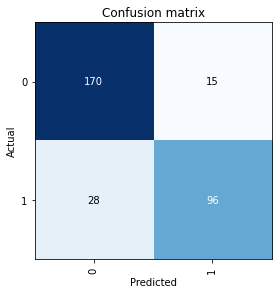

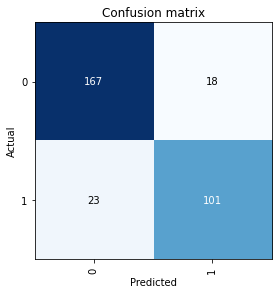

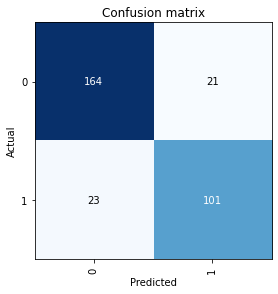

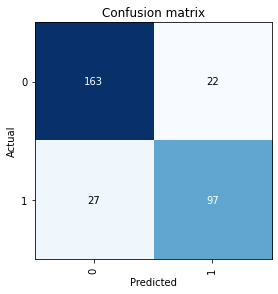

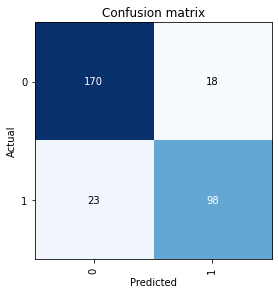

In [13]:
for interp in interprets:
    interp.plot_confusion_matrix(figsize=(4,4))